# Problema de Poisson

## Introducción al problema

El problema de Dirichlet para resolver la ecuación de Poisson en una región $R$ del plano es:
$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=f(x,y)\qquad (x,y)\in R$$
$$u(x,y)=g(x,y)\qquad (x,y)\in\partial R$$
$$u(x,y)\mbox{ es contínua en }\bar{R}$$

Supongamos $R=]0,1[\times]0,1[$ y tomamos una malla de $M\times M$ nodos interiores.

La ecuación de Poisson tiene la discretización siguiente:
    $$v_{i-1,j}+v_{i+1,j}-4v_{i,j}+v_{i,j-1}+v_{i,j+1}=h^2f(x_i,y_j)$$
junto con las condiciones de frontera de Dirichlet:
$$v_{0j}=g(0,y_j),\qquad v_{M+1,j}=g(1,y_j)$$
$$v_{i0}=g(x_i,0),\qquad v_{i,M+1}=g(y_j,1)$$
para $i,j=1,\ldots,M$.

Notemos que con esta definición
$$h=\frac{1}{M+1}$$

## Librerias

In [13]:
import numpy as np
import matplotlib.pylab as plt

## Función Poisson

In [18]:
def Poisson(f,g,M):
    # Calculo h
    h = 1/(M+1)
    # Inicializo u.
    v = [[0 for i in range(M+2)] for i in range(M+2)]
    # Cargamos las condiciones de frontera horizontales.
    for j in range(M+2):
        v[0][j] = g(0,j*h)
        v[M+1][j] = g(1,j*h)
    # Cargamos las condiciones de frontera verticales.
    for i in range(M):
        v[i+1][0] = g((i+1)*h,0)
        v[i+1][M+1] = g((i+1)*h,1)
    # Rellenamos el resto de la matriz.
    for k in range(M**2):
        for i in range(1,M+1):
            for j in range(1,M+1):
                v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j-1]+v[i][j+1]-h**2*f(i*h,j*h))
    return(v)

In [19]:
def f(x,y):
    return(x+y)

## Representación gráfica

In [20]:
def PintarMatriz(matriz):
    m = np.matrix(matriz)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    plt.imshow(m, interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()

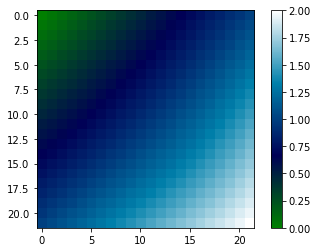

In [22]:
PintarMatriz(Poisson(f,f,20))

## Más pruebas

In [24]:
def uex(x,y):
    "Solución exacta que es cero en la frontera"
    return x*(x-1)*y*(y-1)/2

def laplace_uex(x,y):
    "Laplaciano de la solución exacta anterior"
    return y*(y-1)+x*(x-1)

def f_uex(x,y):
    "Segundo miembro para el que se tiene una solución exacta"
    return -laplace_uex(x,y)

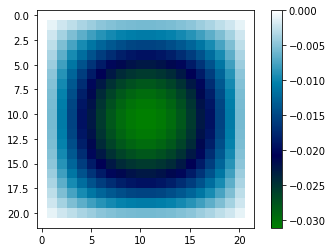

In [25]:
PintarMatriz(Poisson(f_uex,uex,20))